# Showcase

Just an example of network built using this mini-framework

[This dataset](https://archive.ics.uci.edu/dataset/203/yearpredictionmsd) is for prediction of a song's release date based on its audio features

In [1]:
import sys

sys.path.insert(1, '..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from IPython.display import clear_output

from modules.dataloader import DataLoader
from modules.layers import Linear, BatchNormalization, Dropout, Sequential
from modules.activations import ReLU, Softmax
from modules.criterions import MSELoss
from modules.optimizers import Adam
import modules

## 1. Load data

Uncomment line below to download data

In [3]:
# !wget -O ../data/data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [4]:
data = pd.read_csv('../data/data.txt.zip', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
y = data[0]
X = data.drop(columns=[0])

X, y = X.to_numpy(), y.to_numpy()
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

print(f"Full size: {X.shape[0]}, train: {X_train.shape[0]}, valid: {X_valid.shape[0]}, test: {X_test.shape[0]}")

Full size: 515345, train: 360741, valid: 77302, test: 77302


In [6]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
count,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,...,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000,360741.000000
mean,43.380945,1.348823,8.597675,1.159598,-6.527844,-9.483271,-2.395838,-1.789072,3.708980,1.874422,...,15.790079,-73.372617,41.747405,37.939248,0.339246,17.768720,-26.245219,4.456375,19.986434,1.350107
std,6.070991,51.503230,35.240526,16.333302,22.870575,12.873828,14.572389,7.965889,10.571745,6.531604,...,32.129524,175.536777,122.115396,95.276117,16.165517,114.450603,173.954089,13.393637,184.800442,22.119075
min,2.643390,-334.953220,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-424.517570,-3725.762920,-1810.689190,-3098.350310,-272.289050,-3168.924570,-3819.933620,-236.039260,-7458.378150,-381.424430
25%,39.949930,-25.948410,-11.500310,-8.500300,-20.654040,-18.413340,-10.800690,-6.466020,-2.325630,-2.448490,...,-1.791060,-139.348670,-20.806730,-4.669290,-6.766140,-31.557550,-101.491450,-2.586590,-59.584830,-8.822020
50%,44.264260,8.445150,10.413850,-0.643270,-5.987140,-11.147920,-2.063260,-1.728840,3.807870,1.780460,...,9.178070,-52.978250,28.998170,33.590980,0.832100,15.595740,-21.063160,3.102050,7.660520,0.054880
75%,47.826100,36.121260,29.668270,8.779200,7.775010,-2.361800,6.503540,2.915000,9.932970,6.148370,...,26.303510,13.518410,89.707660,77.714780,8.486470,67.744720,52.518350,9.954900,86.434560,9.721150
max,61.970140,384.065730,305.121390,335.771820,262.068870,119.815590,172.402680,126.741270,146.297950,60.345350,...,840.973380,3255.320740,2758.579760,1706.224320,260.544900,2277.990670,2833.608950,463.419500,6946.627670,677.899630


In [7]:
pd.DataFrame(y_train).describe()

,0
count,360741.000000
mean,1998.379743
std,10.944053
min,1922.000000
25%,1994.000000
50%,2002.000000
75%,2006.000000
max,2010.000000


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


min_train, max_train = y_train.min(), y_train.max()


def normalize(sample):
    return (sample - min_train) / (max_train - min_train)


def denormalize(sample):
    return sample * (max_train - min_train) + min_train

In [9]:
BATCH_SIZE = 32

train_loader = DataLoader(X_train, normalize(y_train), BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(X_valid, normalize(y_valid), batch_size=BATCH_SIZE)
test_loader = DataLoader(X_test, normalize(y_test), batch_size=BATCH_SIZE)

## 2. Little bit of data analysys

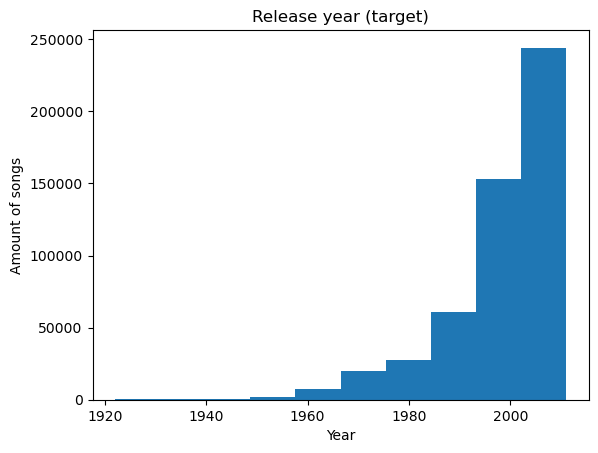

In [10]:
plt.hist(y)
plt.title("Release year (target)")
plt.xlabel("Year")
plt.ylabel("Amount of songs")
plt.show()

## 3. Baseline

Simple algorithm we will use to check if the network is training properly

In [11]:
criterion = MSELoss()

In [12]:
from sklearn.linear_model import LinearRegression

baseline = LinearRegression()
baseline.fit(X_train, y_train)
baseline_predictions = baseline.predict(X_test)
baseline_loss = criterion(baseline_predictions, y_test)

const_predictions = np.full(y_test.shape, y_train.mean())
const_loss = criterion(const_predictions, y_test)

print(f"Baseline loss = {baseline_loss}, const loss = {const_loss}")

Baseline loss = 91.02706636695002, const loss = 118.62686525653785


## 4. Neural Network

In [13]:
def plot_training(
    losses_train,
    losses_test,
    metric_train,
    metric_test,
    title_loss="Loss",
    title_metric="Metric",
    label_train="train",
    label_test="test",
):
    clear_output()
    epochs = range(1, len(losses_train) + 1)
    _, ax = plt.subplots(1, 2)
    
    ax[0].plot(epochs, losses_train, marker="*", label=label_train)
    ax[0].plot(epochs, losses_test, marker="*", label=label_test)
    ax[0].set_title(title_loss)
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel(title_loss)
    ax[0].legend()

    ax[1].plot(epochs, metric_train, marker="*", label=label_train)
    ax[1].plot(epochs, metric_test, marker="*", label=label_test)
    ax[1].set_title(title_metric)
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel(title_metric)
    ax[1].legend()
    
    plt.show()

In [14]:
def train_and_validate(
    model: modules.Module,
    optimizer: modules.Optimizer,
    criterion: modules.Criterion,
    metric: callable,
    train_loader: modules.DataLoader,
    val_loader: modules.DataLoader,
    num_epochs: int,
    verbose=True,
    title_loss="Loss",
    title_metric="Metric",
):
    losses_train = []
    losses_valid = []
    metric_train = []
    metric_valid = []

    for epoch in range(1, num_epochs + 1):
        model.train()

        progress_bar = (
            tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}")
            if verbose
            else train_loader
        )
        running_loss = 0
        running_metric = 0

        for X_batch, y_batch in progress_bar:
            optimizer.zero_grad()

            pred = model(X_batch)
            loss_value = criterion(pred, y_batch)

            grad_output = criterion.backward(pred, y_batch)
            model.backward(X_batch, grad_output)

            optimizer.step()

            metric_value = metric(pred, y_batch)
            running_loss += loss_value * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                progress_bar.set_postfix({"loss": loss_value, "MSE": metric_value})

        losses_train.append(running_loss / train_loader.num_samples())
        metric_train.append(running_metric / train_loader.num_samples())

        model.eval()
        progress_bar = (
            tqdm(val_loader, desc=f"Validating {epoch}/{num_epochs}")
            if verbose
            else val_loader
        )
        running_loss = 0
        running_metric = 0

        for X_batch, y_batch in progress_bar:
            pred = model(X_batch)
            loss_value = criterion(pred, y_batch)
            metric_value = metric(pred, y_batch)
            running_loss += loss_value * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]
            if verbose:
                progress_bar.set_postfix({"loss": loss_value, "MSE": metric_value})

        losses_valid.append(running_loss / val_loader.num_samples())
        metric_valid.append(running_metric / val_loader.num_samples())

        if verbose:
            plot_training(
                losses_train,
                losses_valid,
                metric_train,
                metric_valid,
                title_loss=title_loss,
                title_metric=title_metric,
                label_test="valid",
            )

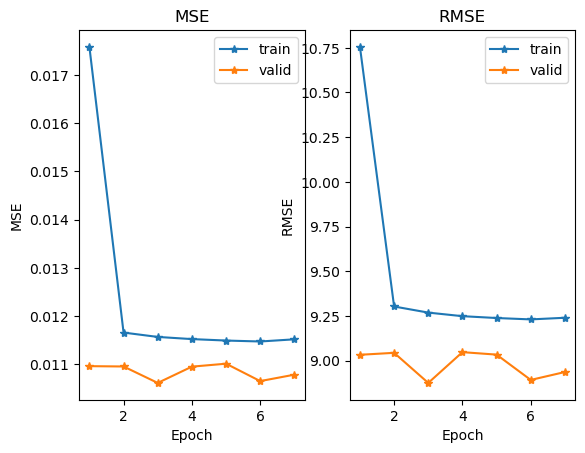

In [15]:
HIDDEN_SIZE = 128
DROPOUT_PROBABILITY = 0.5
N_EPOCHS = 7

net = Sequential(
    Linear(in_features=X.shape[1], out_features=HIDDEN_SIZE),
    ReLU(),
    Dropout(p=DROPOUT_PROBABILITY),
    Linear(in_features=HIDDEN_SIZE, out_features=1),
)
optimizer = Adam(net)
criterion = MSELoss()
metric = lambda output, target: criterion(denormalize(output), denormalize(target)) ** 0.5

train_and_validate(net, optimizer, criterion, metric, train_loader, valid_loader, N_EPOCHS, title_loss="MSE", title_metric="RMSE")

In [16]:
mse_net = criterion(denormalize(net(X_test)), y_test)
print(f"Neural Net MSE: {mse_net}")
print(f"Baseline MSE: {baseline_loss}")

Neural Net MSE: 83.70032794837066
Baseline MSE: 91.02706636695002
